# Zomato Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project we will be analyzing Zomato data from various aspects. Zomato is an Indian multinational restaurant aggregator and food delivery company founded in 2008. Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities.

We have 1 dataset for this project with the name of "zomato.csv" and the variable descriptions in the dataset are as follows : 

**Variable Descriptions:** 

**url**: contains the url of the restaurant in the zomato website

**address**: contains the address of the restaurant in Bengaluru

**name**: contains the name of the restaurant

**online_order**: whether online ordering is available in the restaurant or not

**book_table**: table book option available or not

**rate**: contains the overall rating of the restaurant out of 5

**votes**: contains total number of rating for the restaurant as of the above mentioned date

**phone**: contains the phone number of the restaurant

**location**: contains the neighborhood in which the restaurant is located

**rest_type**: restaurant type

**dish_liked**: dishes people liked in the restaurant

**cuisines**: food styles separated by comma

**approx_cost(for two people)**: contains the approximate cost for meal for two people

**reviews_list**: list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer

**menu_item**: contains list of menus available in the restaurant

**listed_in(type)**: type of meal

**listed_in(city)**: contains the neighborhood in which the restaurant is listed

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'zomato.csv')
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [3]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [5]:
df.shape

(51717, 17)

### Data Cleaning

In [6]:
df.isnull().sum() #we can use df.isna().sum() also in here. 

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0] #if na values>0 we see in here
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [8]:
for feature in feature_na:
    print(' {} has % {} of total data (len(df)) missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4))) #% of na values in the df 

 rate has % 15.0337 of total data (len(df)) missing values
 phone has % 2.3358 of total data (len(df)) missing values
 location has % 0.0406 of total data (len(df)) missing values
 rest_type has % 0.4389 of total data (len(df)) missing values
 dish_liked has % 54.2916 of total data (len(df)) missing values
 cuisines has % 0.087 of total data (len(df)) missing values
 approx_cost(for two people) has % 0.669 of total data (len(df)) missing values


In [9]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [11]:
df.shape

(43942, 17)

In [12]:
def split(x): 
    return x.split('/')[0]

In [13]:
df['rate']=df['rate'].apply(split) #we removed the extra "/5" in rate in here

In [14]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table rate  votes                             phone  \
0          Yes        Yes  4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1    787                      080 41714161   
2          Yes         No  3.8    918                    +91 9663487993   
3           No         No  3.7     88                    +91 9620009302   
4           No         No  3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [15]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [16]:
df.replace('NEW',0,inplace=True)

In [17]:
df.replace('-',0,inplace=True)

In [18]:
df.rate.unique(), df.rate.dtype

(array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
        '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
        '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
        '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
        '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
        '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
        '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
        '2.0 ', '1.8 '], dtype=object),
 dtype('O'))

In [19]:
df.rate.isna().sum() #we removed all the null values 

0

In [20]:
df['rate']=df['rate'].astype(float)
df['rate'].dtype

dtype('float64')

<a id='eda'></a>
## Exploratory Data Analysis

#### Analyzing the Average Rating of Each Restaurant 

In [21]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [22]:
df.groupby('name')['rate'].mean()

name
#FeelTheROLL                                    3.400000
#L-81 Cafe                                      3.900000
#refuel                                         3.700000
1000 B.C                                        3.200000
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C            3.700000
                                                  ...   
i-Bar - The Park Bangalore                      3.800000
iFruit Live Ice Creams                          3.400000
iSpice Resto Cafe                               3.700000
nu.tree                                         4.314286
re:cess - Hilton Bangalore Embassy GolfLinks    4.100000
Name: rate, Length: 7162, dtype: float64

In [23]:
df_rate=df.groupby('name')['rate'].mean().to_frame().reset_index()
df_rate.head()

name  rate
0                          #FeelTheROLL   3.4
1                            #L-81 Cafe   3.9
2                               #refuel   3.7
3                              1000 B.C   3.2
4  100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C   3.7

In [24]:
df_rate.columns=['restaurant','avg_rating']
df_rate.columns

Index(['restaurant', 'avg_rating'], dtype='object')

In [25]:
df_rate.head(10).sort_values(by='avg_rating',ascending=False) #we sorted our restaurants in here. 

restaurant  avg_rating
6                    1131 Bar + Kitchen       4.500
9                        1522 - The Pub       4.212
7             12th Main - Grand Mercure       4.100
8                         1441 Pizzeria       4.100
1                            #L-81 Cafe       3.900
2                               #refuel       3.700
4  100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C       3.700
5            11 to 11 Express Biriyanis       3.500
0                          #FeelTheROLL       3.400
3                              1000 B.C       3.200

Based on our average rating calculations we can see in here the top 10 restaurants. The first restaurant is 1131 Bar + Kitchen and has an average rating of 4.5, the second restaurant
is 1522 - The Pub and has an average rating of 4.21 and the third restaurant is 12th Main- Grand Mercure and has an average rating of 4.1. The last restaurant in the top 10s is 1000 B.C
restaurant an has an average rating of 3.2 

#### Getting the Distribution of Rating Column and Trying To Find Out the Type of Distribution This Feature Support 

In [26]:
df_rate.head()

restaurant  avg_rating
0                          #FeelTheROLL         3.4
1                            #L-81 Cafe         3.9
2                               #refuel         3.7
3                              1000 B.C         3.2
4  100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C         3.7

<AxesSubplot:xlabel='avg_rating', ylabel='Density'>

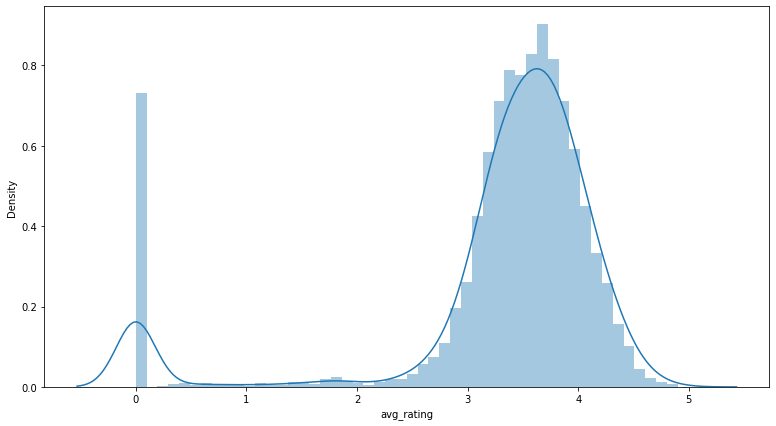

In [27]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 13,7
sns.distplot(df_rate.avg_rating) 

According to our distribution plot we can see that most of the restaurants in this dataset have average rating between 3 and 4. The number of restaurants that have average rating score bigger than 4 is not a lot.

Plus, we know that the restaurant with the best rating is "1131 Bar + Kitchen" and has an average rating of 4.5. In the left part of the plot we see a long straight column with 0 rating. This is because of our data cleaning. We removed "New" rating scores with 0 and that's why "New" restaurants have 0 rating in here. This score is the average rating of the new restaurants.

#### Analyzing the Top 10 Restaurant Chains

In [28]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [29]:
df.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Sarjapur Road',
       'Wilson Garden', 'Shanti Nagar', 'Koramangala 5th Block',
       'Richmond Road', 'HSR', 'Marathahalli', 'Koramangala 7th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [30]:
df['name'].value_counts()[0:10] 

Cafe Coffee Day      89
Onesta               85
Empire Restaurant    71
Five Star Chicken    68
Kanti Sweets         68
Just Bake            68
Petoo                64
Baskin Robbins       63
Pizza Hut            62
Polar Bear           61
Name: name, dtype: int64

In [31]:
df_rate.head(10).sort_values(by='avg_rating', ascending=False) #we sorted our restaurants in here.

restaurant  avg_rating
6                    1131 Bar + Kitchen       4.500
9                        1522 - The Pub       4.212
7             12th Main - Grand Mercure       4.100
8                         1441 Pizzeria       4.100
1                            #L-81 Cafe       3.900
2                               #refuel       3.700
4  100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C       3.700
5            11 to 11 Express Biriyanis       3.500
0                          #FeelTheROLL       3.400
3                              1000 B.C       3.200

Text(0, 0.5, 'Name Of The Restaurants')

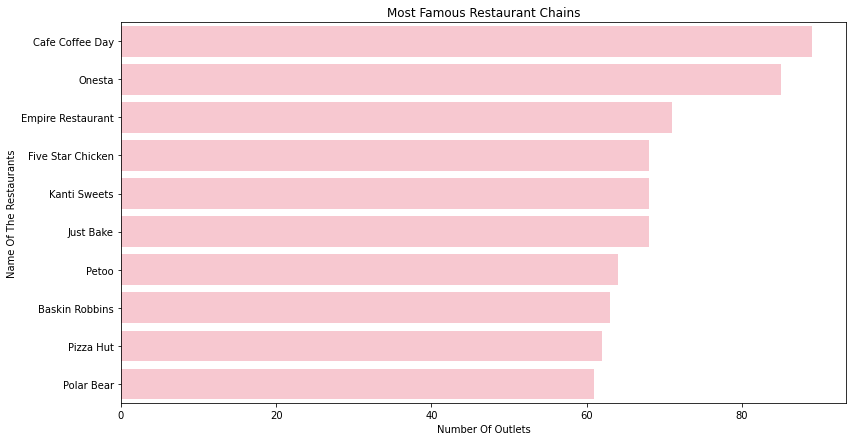

In [32]:
chains=df.name.value_counts()[0:10]
sns.barplot(x=chains, y=chains.index, color='pink') #chains.index is the restaurant name
plt.title('Most Famous Restaurant Chains')
plt.xlabel('Number Of Outlets')
plt.ylabel('Name Of The Restaurants')

Regarding our bar chart we see that top 3 most famuous restaurant chains are "Cafe Coffee Day","Onesta" and "Empire Restaurant". Plus, we can see that "Just Bake", "Five Star Chicken" and "Kanti Sweets" restaurants have the same number of outlets.
However, it is interesting that none of these restaurants are seen in the top 10 most averagely rated restaurants.

#### Calculating the Online Orders Situtations (Accepting or Not Accepting)

In [33]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [34]:
online_orders=df['online_order'].value_counts()
online_orders

Yes    28308
No     15634
Name: online_order, dtype: int64

In [35]:
import plotly.graph_objects as go
fig=go.Figure(go.Pie(
    values=online_orders,
    labels=['accepted','not accepted'],
    title='Restaurant Dispersion'
))
fig.show()

In this pie chart we see that most of the restaurants provide online orders. With a ratio of 64.4% restaurants accept online orders and 35.6% do not accept online orders.

#### Ratio Between Restaurants (Table Provide or Not)

In [36]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [37]:
book_table=df['book_table'].value_counts()
book_table

No     37509
Yes     6433
Name: book_table, dtype: int64

In [38]:
labels=['not booked','booked']

In [39]:
import plotly.graph_objects as go
from plotly.offline import iplot
trace=go.Pie(values=book_table,labels=labels, hoverinfo='label+percent', textinfo='value')
iplot([trace])

In this pie chart we see that most of the restaurants do not provide book table. With a ratio of 85.4% restaurants do not book table and 14.6% of the restaurants book table. 

#### Analyzing The Type of Restaurants

In [40]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [41]:
df['rest_type'].isna().sum()

151

In [42]:
df_rest_type_dropped=df['rest_type'].dropna()

In [43]:
df_rest_type_dropped.isna().sum()

0

In [44]:
len(df_rest_type_dropped.unique()) 

87

In [45]:
df_rest_type_dropped.value_counts().nlargest(10)

Quick Bites           15073
Casual Dining          9923
Cafe                   3527
Dessert Parlor         1939
Delivery               1791
Takeaway, Delivery     1472
Casual Dining, Bar     1141
Bakery                  775
Beverage Shop           704
Bar                     661
Name: rest_type, dtype: int64

In [46]:
trace_rest=go.Bar(x=df_rest_type_dropped.value_counts().nlargest(10).index, y=df_rest_type_dropped.value_counts().nlargest(10))
iplot([trace_rest])

As we can see in here "Quick Bites", "Casual Dining", "Cafe", "Dessert Parlor" and "Delivery" restaurant types are top 5 most common restaurant types.

#### Highest Voted Restaurants

In [47]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

<AxesSubplot:ylabel='name'>

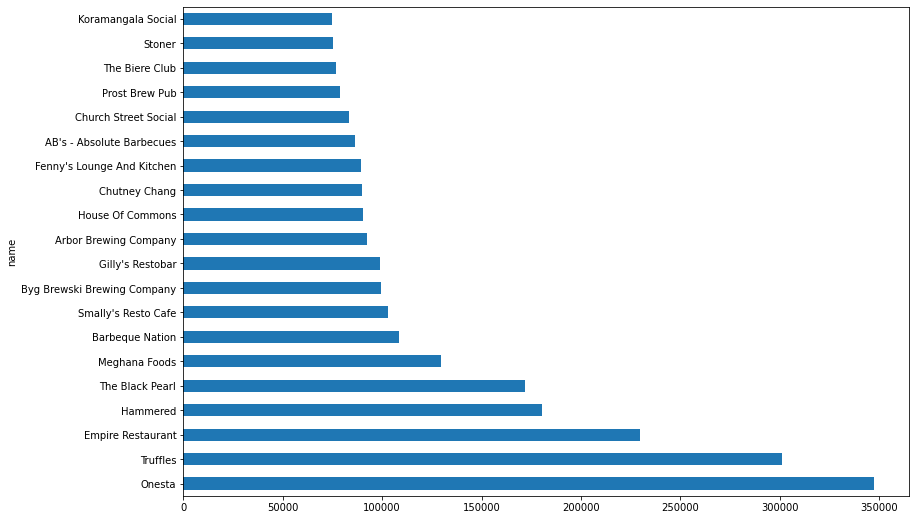

In [48]:
plt.figure(figsize=(13,9))
df.groupby('name')['votes'].sum().nlargest(20).plot.barh()

In [49]:
trace_votes=go.Bar(x=df.groupby('name')['votes'].sum().nlargest(20).index,
       y=df.groupby('name')['votes'].sum().nlargest(20))
iplot([trace_votes])

In here we see that top 3 voted restaurants are "Onesta", "Truffles" and "Empire Restaurant". As we can remember based on our previous analyses "Onesta" and "Empire Restaurant" are in our most famuous restaurants too. 

#### Total Restaurants at Different Locations 

In [50]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [51]:
location=[]
number_of_restaurants=[]

for key, location_df in df.groupby('location'):
    location.append(key) #key returns the name of location 
    number_of_restaurants.append(len(location_df['name'].unique()))

In [52]:
df_total_restaurants=pd.DataFrame(zip(location,number_of_restaurants))
df_total_restaurants.columns=['location','number of restaurants']
df_total_restaurants.head() 

location  number of restaurants
0                BTM                    581
1       Banashankari                    238
2          Banaswadi                    151
3  Bannerghatta Road                    362
4       Basavanagudi                    195

In [53]:
df_total_restaurants.set_index('location',inplace=True)
df_total_restaurants.head()

number of restaurants
location                                
BTM                                  581
Banashankari                         238
Banaswadi                            151
Bannerghatta Road                    362
Basavanagudi                         195

In [54]:
df_total_restaurants.sort_values(by='number of restaurants', ascending=False).head(10)

number of restaurants
location                                
Whitefield                           634
BTM                                  581
HSR                                  553
Marathahalli                         525
Electronic City                      518
Indiranagar                          467
JP Nagar                             400
Bannerghatta Road                    362
Jayanagar                            311
Bellandur                            284

<AxesSubplot:ylabel='location'>

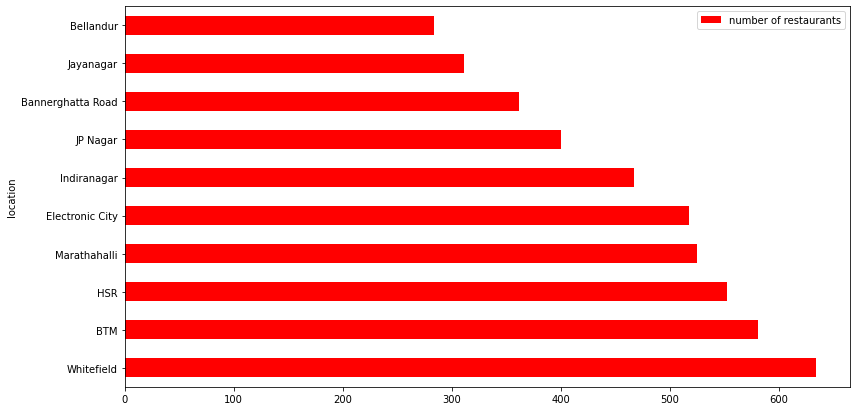

In [55]:
df_total_restaurants.sort_values(by='number of restaurants', ascending=False).head(10).plot.barh(color='red')

According to our plot we see that "Whitefield" has the most number of restaurants with 634, then second "BTM" with 581 restaurants and third "HSR" with 553 restaurants. 

#### Total Number of Cuisines Based On The Variety of Restaurants

In [56]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [57]:
cuisines=df['cuisines'].value_counts()[0:10] #local cuisine info in here. 
cuisines.head(10)

North Indian                           2294
North Indian, Chinese                  2060
South Indian                           1320
Cafe                                    653
Bakery, Desserts                        644
Biryani                                 641
South Indian, North Indian, Chinese     601
Fast Food                               580
Desserts                                572
Chinese                                 449
Name: cuisines, dtype: int64

In [58]:
iplot([go.Bar(x=cuisines.index,y=cuisines)])

In our graph based on the total number of cuisines top 3 cuisines are "North Indian","North Indian, Chinese" and "South Indian".

#### Analyzing The Approximate Cost For Two People In A Restaurant 

In [59]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [60]:
df['approx_cost(for two people)'].isna().sum()

252

In [61]:
df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)

In [62]:
df['approx_cost(for two people)'].isna().sum()

0

ValueError: could not convert string to float: '1,200'

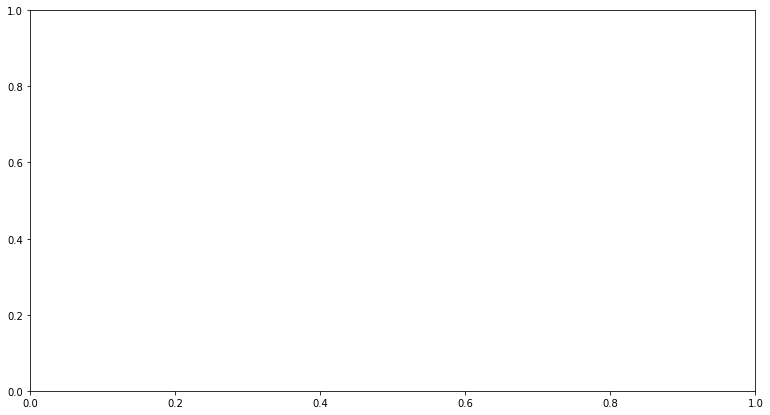

In [63]:
sns.distplot(df['approx_cost(for two people)'])

In [ ]:
df['approx_cost(for two people)'].dtype

In [64]:
df['approx_cost(for two people)'].unique() #we faced with error because of the commas in our data in here 

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [65]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [66]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [67]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

In [68]:
df['approx_cost(for two people)'].dtype

dtype('int64')

In [69]:
df['approx_cost(for two people)'].value_counts(ascending=False)

300     5735
400     5562
500     4326
200     3527
600     3365
        ... 
3700       1
560        1
5000       1
360        1
160        1
Name: approx_cost(for two people), Length: 66, dtype: int64

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

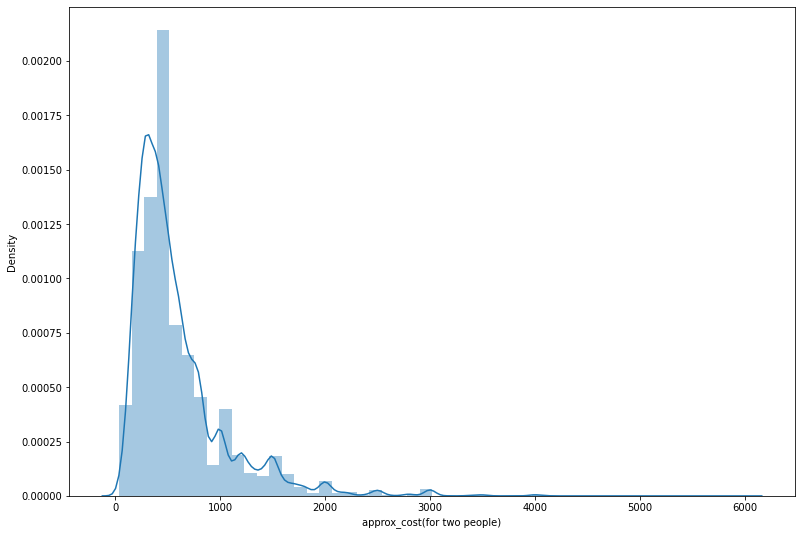

In [70]:
rcParams['figure.figsize'] = 13,9
sns.distplot(df['approx_cost(for two people)'])

Based on our distribution plot we see that mostly approximate cost for two people is between 300-500 rupee.

<AxesSubplot:xlabel='rate', ylabel='approx_cost(for two people)'>

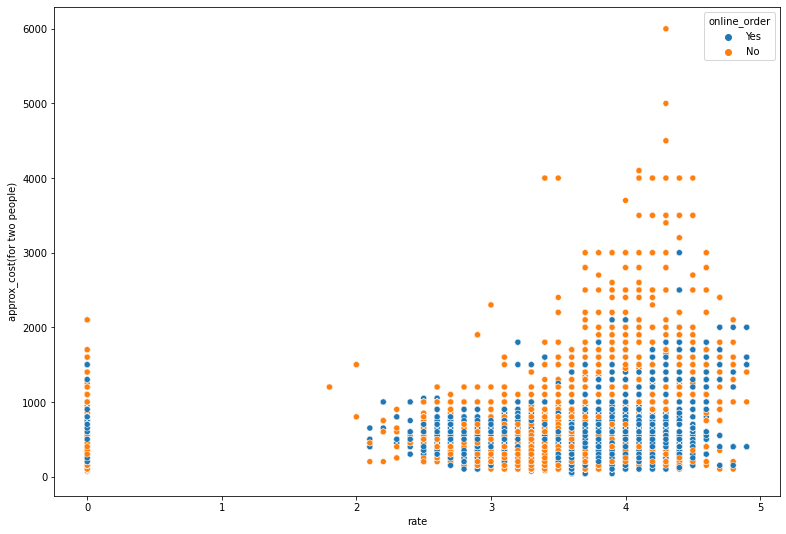

In [71]:
sns.scatterplot(data=df, x='rate', y='approx_cost(for two people)', hue='online_order')

In [72]:
df[['rate','approx_cost(for two people)']].corr()

rate  approx_cost(for two people)
rate                         1.00000                      0.24993
approx_cost(for two people)  0.24993                      1.00000

When we calculate the correlation between rate and approx_cost(for two people) there is not a strong correlation. Plus, when we check our scatter plot "New" restaurants (0 rating) do not cross the 2000 rupee and also we can see that 
most of the expensive costs do not have online orders and in total we can see that most of the order costs are between 0 and 2000 rupee. 

#### Analyzing The Differences of Restaurant Votes/Prices On Accepting/Not Accepting Online Orders

<AxesSubplot:xlabel='online_order', ylabel='votes'>

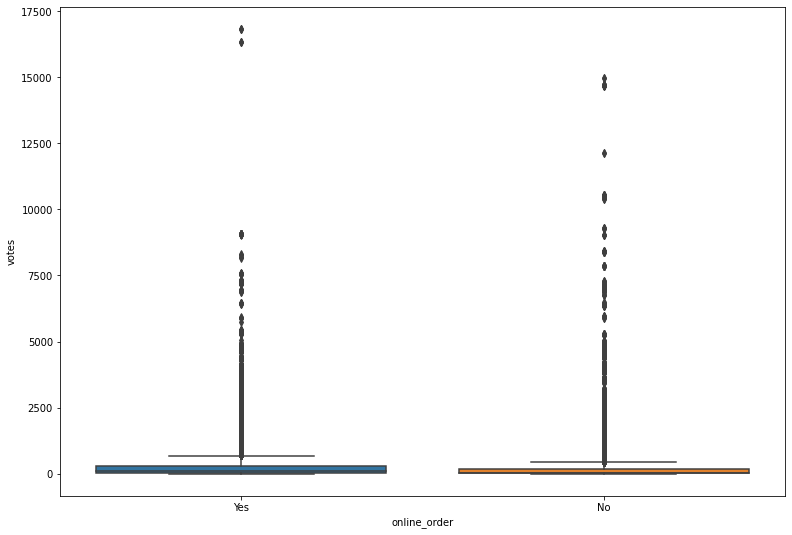

In [73]:
sns.boxplot(x='online_order',y='votes',data=df)

In [74]:
import plotly.express as px
px.box(df,x='online_order',y='votes')

<AxesSubplot:xlabel='online_order', ylabel='approx_cost(for two people)'>

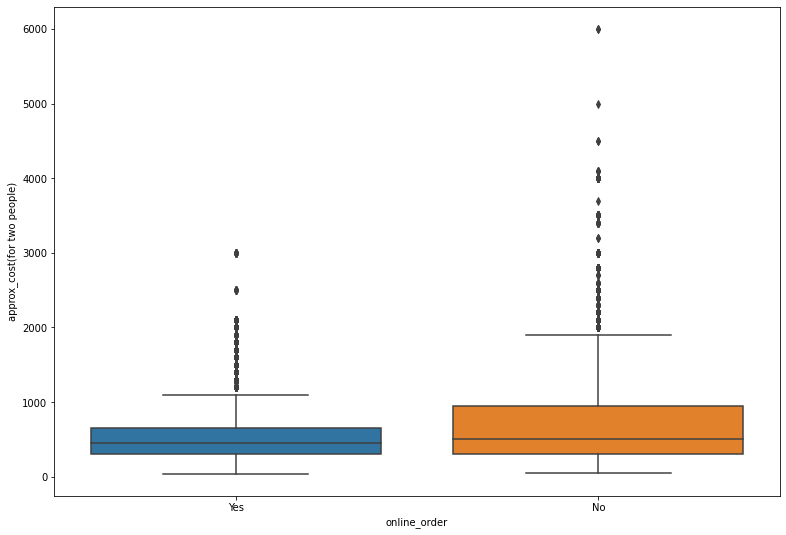

In [75]:
sns.boxplot(x='online_order',y='approx_cost(for two people)',data=df)

In [76]:
import plotly.express as px
px.box(df,x='online_order',y='approx_cost(for two people)')

In our plots we see that the total number of votes based on online order "No" type restaurants are more than the online order "Yes" type restaurants. We can infer from here that people are tend to more voter to the online order "No" type restaurants. In our second plot in here we can see that
approximate cost for two people are more than the online order "Yes" restaurant types. Because these types restaurants are cheaper than the online_order "No" types of restaurants. 

#### Most Expensive and Cheap Restaurants With Approximately Cost for Two People

In [77]:
df['approx_cost(for two people)'].min()

40

In [78]:
df['approx_cost(for two people)'].max()

6000

In [79]:
df[df['approx_cost(for two people)']==6000]['name'] #These are the most expensive restaurants. 

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

In [80]:
df.set_index('name',inplace=True)
df.head()

url  \
name                                                                       
Jalsa                  https://www.zomato.com/bangalore/jalsa-banasha...   
Spice Elephant         https://www.zomato.com/bangalore/spice-elephan...   
San Churro Cafe        https://www.zomato.com/SanchurroBangalore?cont...   
Addhuri Udupi Bhojana  https://www.zomato.com/bangalore/addhuri-udupi...   
Grand Village          https://www.zomato.com/bangalore/grand-village...   

                                                                 address  \
name                                                                       
Jalsa                  942, 21st Main Road, 2nd Stage, Banashankari, ...   
Spice Elephant         2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
San Churro Cafe        1112, Next to KIMS Medical College, 17th Cross...   
Addhuri Udupi Bhojana  1st Floor, Annakuteera, 3rd Stage, Banashankar...   
Grand Village          10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   

                      online_order book_table  rate  votes  \
name                                                         
Jalsa                          Yes        Yes   4.1    775   
Spice Elephant                 Yes         No   4.1    787   
San Churro Cafe                Yes         No   3.8    918   
Addhuri Udupi Bhojana           No         No   3.7     88   
Grand Village                   No         No   3.8    166   

                                                  phone      location  \
name                                                                    
Jalsa                    080 42297555\r\n+91 9743772233  Banashankari   
Spice Elephant                             080 41714161  Banashankari   
San Churro Cafe                          +91 9663487993  Banashankari   
Addhuri Udupi Bhojana                    +91 9620009302  Banashankari   
Grand Village          +91 8026612447\r\n+91 9901210005  Basavanagudi   

                                 rest_type  \
name                                         
Jalsa                        Casual Dining   
Spice Elephant               Casual Dining   
San Churro Cafe        Cafe, Casual Dining   
Addhuri Udupi Bhojana          Quick Bites   
Grand Village                Casual Dining   

                                                              dish_liked  \
name                                                                       
Jalsa                  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
Spice Elephant         Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
San Churro Cafe        Churros, Cannelloni, Minestrone Soup, Hot Choc...   
Addhuri Udupi Bhojana                                        Masala Dosa   
Grand Village                                        Panipuri, Gol Gappe   

                                             cuisines  \
name                                                    
Jalsa                  North Indian, Mughlai, Chinese   
Spice Elephant            Chinese, North Indian, Thai   
San Churro Cafe                Cafe, Mexican, Italian   
Addhuri Udupi Bhojana      South Indian, North Indian   
Grand Village                North Indian, Rajasthani   

                       approx_cost(for two people)  \
name                                                 
Jalsa                                          800   
Spice Elephant                                 800   
San Churro Cafe                                800   
Addhuri Udupi Bhojana                          300   
Grand Village                                  600   

                                                            reviews_list  \
name                                                                       
Jalsa                  [('Rated 4.0', 'RATED\n  A beautiful place to ...   
Spice Elephant         [('Rated 4.0', 'RATED\n  Had been here for din...   
San Churro Cafe        [('Rated 3.0', "RATED\n  Ambience is not that ...   
Addhuri Udupi Bhojana  [('Rated 4.0', "RA

<AxesSubplot:ylabel='name'>

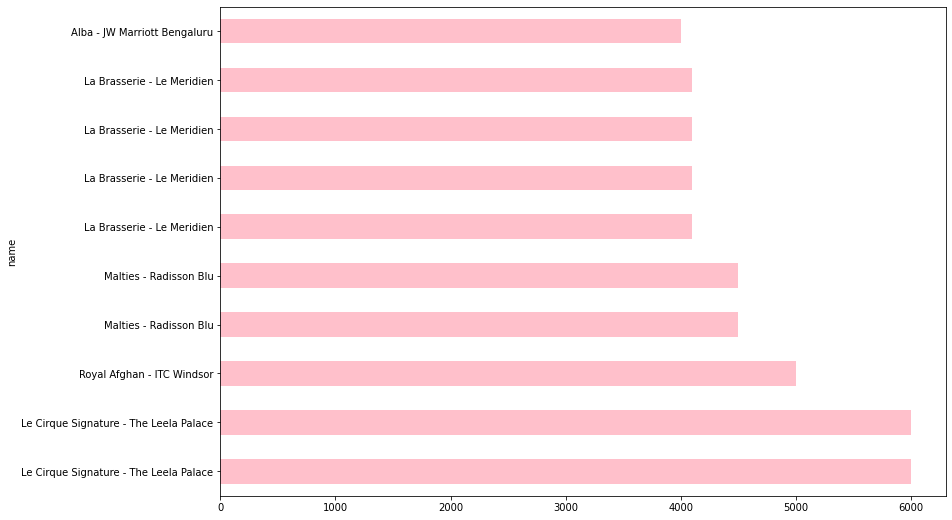

In [81]:
df['approx_cost(for two people)'].nlargest(10).plot.barh(color='pink') #Top 10 restaurants in here. 

<AxesSubplot:ylabel='name'>

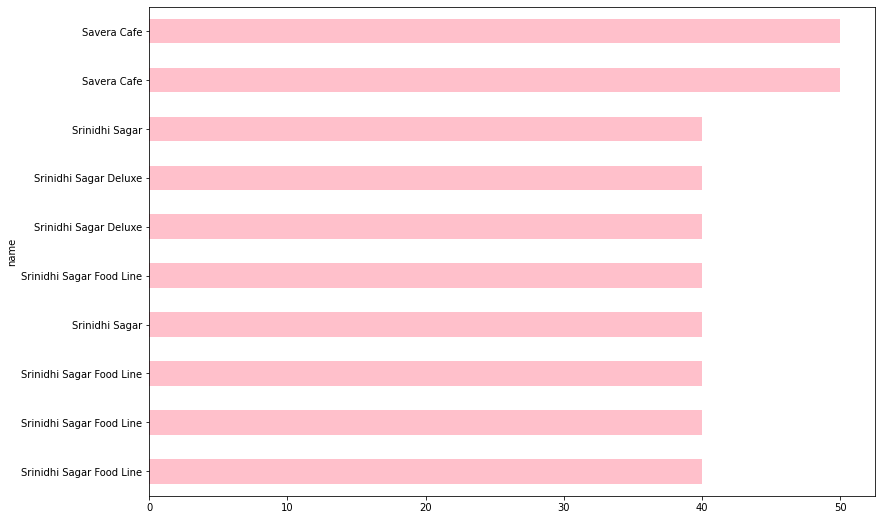

In [82]:
df['approx_cost(for two people)'].nsmallest(10).plot.barh(color='pink') #Top 10 cheapest restaurants in here. 

#### Find All Restaurant That Are below Than 500 and Affordable (Budget Restaurants)  

In [83]:
df[df['approx_cost(for two people)']<=500].head()

url  \
name                                                                                                    
Addhuri Udupi Bhojana                               https://www.zomato.com/bangalore/addhuri-udupi...   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley  https://www.zomato.com/bangalore/caf%C3%A9-dow...   
The Coffee Shack                                    https://www.zomato.com/bangalore/the-coffee-sh...   
Caf-Eleven                                          https://www.zomato.com/bangalore/caf-eleven-ba...   
T3H Cafe                                            https://www.zomato.com/bangalore/t3h-cafe-bana...   

                                                                                              address  \
name                                                                                                    
Addhuri Udupi Bhojana                               1st Floor, Annakuteera, 3rd Stage, Banashankar...   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley  12,29 Near PES University Back Gate, D'Souza N...   
The Coffee Shack                                        6th Block, 3rd Stage, Banashankari, Bangalore   
Caf-Eleven                                          111, Sapphire Toys Building, 100 Feet Ring Roa...   
T3H Cafe                                            504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   

                                                   online_order book_table  \
name                                                                         
Addhuri Udupi Bhojana                                        No         No   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley          Yes         No   
The Coffee Shack                                            Yes        Yes   
Caf-Eleven                                                   No         No   
T3H Cafe                                                     No         No   

                                                    rate  votes  \
name                                                              
Addhuri Udupi Bhojana                                3.7     88   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley   4.1    402   
The Coffee Shack                                     4.2    164   
Caf-Eleven                                           4.0    424   
T3H Cafe                                             3.9     93   

                                                                             phone  \
name                                                                                 
Addhuri Udupi Bhojana                                               +91 9620009302   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley  080 26724489\r\n+91 7406048982   
The Coffee Shack                                                    +91 9731644212   
Caf-Eleven                                                            080 49577715   
T3H Cafe                                                            +91 8884726600   

                                                        location    rest_type  \
name                                                                            
Addhuri Udupi Bhojana                               Banashankari  Quick Bites   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley  Banashankari         Cafe   
The Coffee Shack                                    Banashankari         Cafe   
Caf-Eleven                                          Banashankari         Cafe   
T3H Cafe                                            Banashankari         Cafe   

                                                                                           dish_liked  \
name                                                                                                    
Addhuri Udupi Bhojana                                                                     Masala Dosa   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley  Waffles, Pasta, Crispy Chicken, Honey Chilli C...   
The Coffee Shack  

In [84]:
df_budget=df[df['approx_cost(for two people)']<=500].loc[:, ('approx_cost(for two people)')]
df_budget

name
Addhuri Udupi Bhojana                                 300
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley    500
The Coffee Shack                                      500
Caf-Eleven                                            450
T3H Cafe                                              300
                                                     ... 
Venice Kerala Restaurant                              200
Thai & Chinese Fast Food                              400
The Crunch                                            300
Punjabi Charchay                                      400
Raapchick                                             300
Name: approx_cost(for two people), Length: 26330, dtype: int64

In [85]:
df_budget=df_budget.reset_index()

In [86]:
df_budget.sort_values(by=['approx_cost(for two people)'],ascending=True).head()

name  approx_cost(for two people)
15548     Srinidhi Sagar Deluxe                           40
3027   Srinidhi Sagar Food Line                           40
16921            Srinidhi Sagar                           40
6498   Srinidhi Sagar Food Line                           40
14185     Srinidhi Sagar Deluxe                           40

In here we can see the budget hotel list that have approximate cost for two people below 500 and the lowest approximate cost is 40 rupee according to our budget restaurants dataframe.

#### The Budget Restaurants That Have Good Rating (Over 4)

In [87]:
df=df.reset_index()
df.head()

name                                                url  \
0                  Jalsa  https://www.zomato.com/bangalore/jalsa-banasha...   
1         Spice Elephant  https://www.zomato.com/bangalore/spice-elephan...   
2        San Churro Cafe  https://www.zomato.com/SanchurroBangalore?cont...   
3  Addhuri Udupi Bhojana  https://www.zomato.com/bangalore/addhuri-udupi...   
4          Grand Village  https://www.zomato.com/bangalore/grand-village...   

                                             address online_order book_table  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...          Yes        Yes   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...          Yes         No   
2  1112, Next to KIMS Medical College, 17th Cross...          Yes         No   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...           No         No   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...           No         No   

   rate  votes                             phone      location  \
0   4.1    775    080 42297555\r\n+91 9743772233  Banashankari   
1   4.1    787                      080 41714161  Banashankari   
2   3.8    918                    +91 9663487993  Banashankari   
3   3.7     88                    +91 9620009302  Banashankari   
4   3.8    166  +91 8026612447\r\n+91 9901210005  Basavanagudi   

             rest_type                                         dish_liked  \
0        Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3          Quick Bites                                        Masala Dosa   
4        Casual Dining                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [88]:
df[(df['rate']>4)&(df['approx_cost(for two people)']<=500)].shape

(2436, 17)

In [89]:
df_good_rest=df[(df['rate']>4)&(df['approx_cost(for two people)']<=500)]
df_good_rest.head()

name  \
10  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...   
12                                   The Coffee Shack   
34                                             Faasos   
51                                   Shree Cool Point   
52                             Corner House Ice Cream   

                                                  url  \
10  https://www.zomato.com/bangalore/caf%C3%A9-dow...   
12  https://www.zomato.com/bangalore/the-coffee-sh...   
34  https://www.zomato.com/bangalore/faasos-banash...   
51  https://www.zomato.com/bangalore/shree-cool-po...   
52  https://www.zomato.com/bangalore/corner-house-...   

                                              address online_order book_table  \
10  12,29 Near PES University Back Gate, D'Souza N...          Yes         No   
12      6th Block, 3rd Stage, Banashankari, Bangalore          Yes        Yes   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...          Yes         No   
51  1514, 4th Cross, 7th Main, RPC layout, 2nd Sta...          Yes         No   
52  808/6-1, 24th A Cross, K.R Road, 2nd Stage, Ba...           No         No   

    rate  votes                           phone      location       rest_type  \
10   4.1    402  080 26724489\r\n+91 7406048982  Banashankari            Cafe   
12   4.2    164                  +91 9731644212  Banashankari            Cafe   
34   4.2    415                  +91 7700020020  Banashankari     Quick Bites   
51   4.1     28                  +91 9900617124   Vijay Nagar     Quick Bites   
52   4.3    345  080 26713965\r\n+91 9845444155  Banashankari  Dessert Parlor   

                                           dish_liked  \
10  Waffles, Pasta, Crispy Chicken, Honey Chilli C...   
12  Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...   
34  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
51                                                NaN   
52  Hot Chocolate Fudge, Vanilla Ice Cream, Fudge ...   

                               cuisines  approx_cost(for two people)  \
10                                 Cafe                          500   
12  Cafe, Chinese, Continental, Italian                          500   
34     North Indian, Biryani, Fast Food                          500   
51    Fast Food, Street Food, Beverages                          150   
52                  Ice Cream, Desserts                          400   

                                         reviews_list  \
10  [('Rated 4.0', 'RATED\n  We ended up here on a...   
12  [('Rated 4.0', "RATED\n  Food - 4/5\nAmbience ...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   
51  [('Rated 5.0', 'RATED\n  Who would say no to s...   
52  [('Rated 3.0', "RATED\n  Always a fan of corne...   

                                            menu_item listed_in(type)  \
10                                                 []           Cafes   
12                                                 []           Cafes   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   
51  ['Vegetable Sandwich', 'Vegetable Sandwich wit...        Delivery   
52                                                 []        Delivery   

   listed_in(city)  
10    Banashankari  
12    Banashankari  
34    Banashankari  
51    Banashankari  
52    Banashankari

In [90]:
len(df_good_rest.loc[:,'name'])

2436

According to our analysis we see that we have 2436 restaurants with rating over 4 and approximate cost for two people below&equal 500 rupee.

#### Number of Affordable Restaurants (Budget Restaurants) At All Locations 

In [91]:
df_good_rest.head()

name  \
10  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...   
12                                   The Coffee Shack   
34                                             Faasos   
51                                   Shree Cool Point   
52                             Corner House Ice Cream   

                                                  url  \
10  https://www.zomato.com/bangalore/caf%C3%A9-dow...   
12  https://www.zomato.com/bangalore/the-coffee-sh...   
34  https://www.zomato.com/bangalore/faasos-banash...   
51  https://www.zomato.com/bangalore/shree-cool-po...   
52  https://www.zomato.com/bangalore/corner-house-...   

                                              address online_order book_table  \
10  12,29 Near PES University Back Gate, D'Souza N...          Yes         No   
12      6th Block, 3rd Stage, Banashankari, Bangalore          Yes        Yes   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...          Yes         No   
51  1514, 4th Cross, 7th Main, RPC layout, 2nd Sta...          Yes         No   
52  808/6-1, 24th A Cross, K.R Road, 2nd Stage, Ba...           No         No   

    rate  votes                           phone      location       rest_type  \
10   4.1    402  080 26724489\r\n+91 7406048982  Banashankari            Cafe   
12   4.2    164                  +91 9731644212  Banashankari            Cafe   
34   4.2    415                  +91 7700020020  Banashankari     Quick Bites   
51   4.1     28                  +91 9900617124   Vijay Nagar     Quick Bites   
52   4.3    345  080 26713965\r\n+91 9845444155  Banashankari  Dessert Parlor   

                                           dish_liked  \
10  Waffles, Pasta, Crispy Chicken, Honey Chilli C...   
12  Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...   
34  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
51                                                NaN   
52  Hot Chocolate Fudge, Vanilla Ice Cream, Fudge ...   

                               cuisines  approx_cost(for two people)  \
10                                 Cafe                          500   
12  Cafe, Chinese, Continental, Italian                          500   
34     North Indian, Biryani, Fast Food                          500   
51    Fast Food, Street Food, Beverages                          150   
52                  Ice Cream, Desserts                          400   

                                         reviews_list  \
10  [('Rated 4.0', 'RATED\n  We ended up here on a...   
12  [('Rated 4.0', "RATED\n  Food - 4/5\nAmbience ...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   
51  [('Rated 5.0', 'RATED\n  Who would say no to s...   
52  [('Rated 3.0', "RATED\n  Always a fan of corne...   

                                            menu_item listed_in(type)  \
10                                                 []           Cafes   
12                                                 []           Cafes   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   
51  ['Vegetable Sandwich', 'Vegetable Sandwich wit...        Delivery   
52                                                 []        Delivery   

   listed_in(city)  
10    Banashankari  
12    Banashankari  
34    Banashankari  
51    Banashankari  
52    Banashankari

In [92]:
total=[]
location=[]

for loc, location_df in df_good_rest.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))

In [93]:
location_df=pd.DataFrame(zip(location,total))
location_df.head()

0   1
0                BTM  28
1       Banashankari  16
2          Banaswadi   1
3  Bannerghatta Road   9
4       Basavanagudi  24

In [94]:
location_df.columns=['location','restaurant']
location_df.head() #This is our affordable restaurants in here.

location  restaurant
0                BTM          28
1       Banashankari          16
2          Banaswadi           1
3  Bannerghatta Road           9
4       Basavanagudi          24

In [95]:
len(location_df)

60

According to our analysis we see that we have 60 restaurants with rating over 4 and approximate cost for two people below&equal 500 rupee at all locations. 

#### Finding The Best Budget Restaurants in Any Location 

In [96]:
#defining a function to find the best budget restaurant location and restaurant 
def return_budget(location, restaurant):
    budget=df[(df['approx_cost(for two people)']<=500)&(df['location']==location)&(df['rate']>4)&(df['rest_type']==restaurant)]
    return (budget['name'].unique())

In [97]:
return_budget('BTM','Quick Bites')

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       'Hungry Lee', "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'],
      dtype=object)

According to our parameters we find the best restaurants with our location and restaurant combination in here. 

#### Analyzing The Foodie Locations 

In [98]:
restaurant_location=df['location'].value_counts()[0:20]

In [99]:
restaurant_location.head()

BTM                      4237
Koramangala 5th Block    2358
HSR                      2113
Indiranagar              1892
JP Nagar                 1849
Name: location, dtype: int64

In [100]:
restaurant_location.index #Location names in here.

Index(['BTM', 'Koramangala 5th Block', 'HSR', 'Indiranagar', 'JP Nagar',
       'Jayanagar', 'Whitefield', 'Marathahalli', 'Bannerghatta Road',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Brigade Road',
       'Bellandur', 'Koramangala 1st Block', 'Electronic City',
       'Sarjapur Road', 'Ulsoor', 'Koramangala 4th Block', 'MG Road',
       'Banashankari'],
      dtype='object')

<AxesSubplot:xlabel='location'>

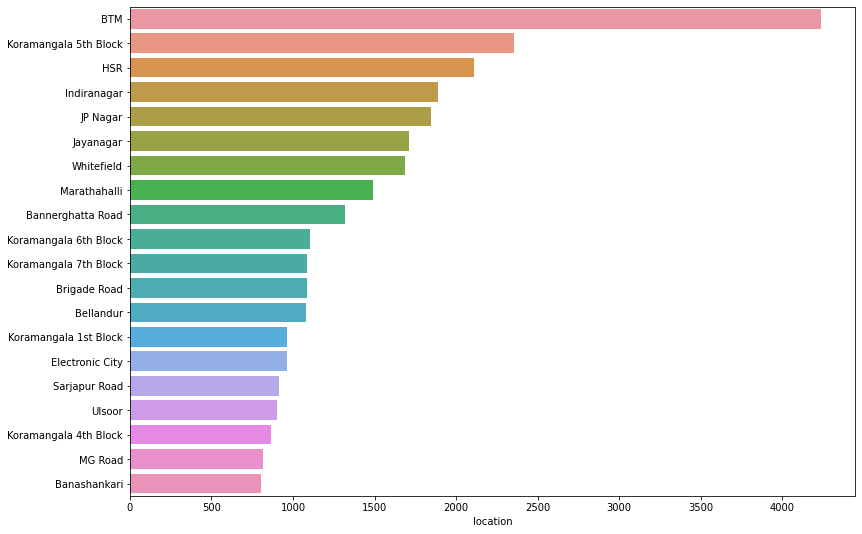

In [101]:
sns.barplot(restaurant_location, restaurant_location.index)

According to our analysis the most foodie locations are "BTM", "Koramangala 5th Block" and "HSR". 

#### Geographical Analysis of The Locations and Restaurants

In [102]:
locations=pd.DataFrame({'Name':df['location'].unique()})
locations.head()

Name
0        Banashankari
1        Basavanagudi
2         Mysore Road
3           Jayanagar
4  Kumaraswamy Layout

In [103]:
len(locations)

92

In [104]:
!pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 25.6 MB/s eta 0:00:00
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(renderable)
  Fi

In [105]:
from geopy.geocoders import Nominatim #This is in order to find the location of the restaurant.
geolocator=Nominatim(user_agent='app')
geolocator

In [106]:
lat_lon=[]

for location in locations['Name'] :
    location=geolocator.geocode(location, timeout=None) #timeout is None in here. 
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo=(location.latitude, location.longitude)
        lat_lon.append(geo)

In [336]:
locations['geo_loc']=lat_lon

In [337]:
locations.head()

Name                           geo_loc
0        Banashankari          (15.8876779, 75.7046777)
1        Basavanagudi          (12.9417261, 77.5755021)
2         Mysore Road          (12.9466619, 77.5300896)
3           Jayanagar  (27.64392675, 83.05280519687284)
4  Kumaraswamy Layout          (12.9081487, 77.5553179)

In [338]:
locations.shape

(92, 2)

In [340]:
restaurant_locations=pd.DataFrame(df['location'].value_counts().reset_index())

In [342]:
restaurant_locations.head()

index  location
0                    BTM      4237
1  Koramangala 5th Block      2358
2                    HSR      2113
3            Indiranagar      1892
4               JP Nagar      1849

In [343]:
restaurant_locations.columns=['Name','count']
restaurant_locations.head()

Name  count
0                    BTM   4237
1  Koramangala 5th Block   2358
2                    HSR   2113
3            Indiranagar   1892
4               JP Nagar   1849

In [344]:
restaurant_locations.shape

(92, 2)

In [345]:
restaurant_locations_last=restaurant_locations.merge(locations, on='Name', how='left').dropna()
restaurant_locations_last.head() #we merged our two dataframes in here. 

Name  count                             geo_loc
0                    BTM   4237  (45.95485055, -112.49659530324134)
1  Koramangala 5th Block   2358            (12.9348429, 77.6189768)
2                    HSR   2113                (18.1475, 41.538889)
3            Indiranagar   1892            (12.9732913, 77.6404672)
4               JP Nagar   1849            (12.2655944, 76.6465404)

In [346]:
np.array(restaurant_locations_last['geo_loc'])

array([(45.95485055, -112.49659530324134), (12.9348429, 77.6189768),
       (18.1475, 41.538889), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.64392675, 83.05280519687284),
       (53.5533682, -2.2969019), (12.9552572, 77.6984163),
       (12.9455327, 77.6025649), (12.9390255, 77.6238477),
       (40.28745, -76.964526), (12.9364846, 77.6134783),
       (12.931585250000001, 77.68436591522214), (12.9275886, 77.6308832),
       (12.848759900000001, 77.64825295827616), (12.920441, 77.6653284),
       (12.9778793, 77.6246697), (12.9327778, 77.6294052),
       (12.9755264, 77.6067902), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (12.9417261, 77.5755021), (40.572423, -74.141107),
       (4.8538161, 100.7456672), (33.5935063, -79.0345627),
       (12.996845, 77.6130165), (40.7101189, -74.0113678),
       (13.0093455, 77.6377094), (13.0170347, 77.5726006),
       (40.7652844, -76.373824), (13.0141618, 77.6518539),
       (12.9882

In [347]:
lat,lon=zip(*np.array(restaurant_locations_last['geo_loc'])) #we unzipped geo_loc and seperated the lat and lon. 

In [349]:
type(lat), type(lon)

(tuple, tuple)

In [350]:
restaurant_locations_last['lat']=lat
restaurant_locations_last['lon']=lon

In [351]:
restaurant_locations_last.head()

Name  count                             geo_loc  \
0                    BTM   4237  (45.95485055, -112.49659530324134)   
1  Koramangala 5th Block   2358            (12.9348429, 77.6189768)   
2                    HSR   2113                (18.1475, 41.538889)   
3            Indiranagar   1892            (12.9732913, 77.6404672)   
4               JP Nagar   1849            (12.2655944, 76.6465404)   

         lat         lon  
0  45.954851 -112.496595  
1  12.934843   77.618977  
2  18.147500   41.538889  
3  12.973291   77.640467  
4  12.265594   76.646540

In [352]:
restaurant_locations_last.drop('geo_loc',axis=1,inplace=True)

In [353]:
restaurant_locations_last.head()

Name  count        lat         lon
0                    BTM   4237  45.954851 -112.496595
1  Koramangala 5th Block   2358  12.934843   77.618977
2                    HSR   2113  18.147500   41.538889
3            Indiranagar   1892  12.973291   77.640467
4               JP Nagar   1849  12.265594   76.646540

In [355]:
restaurant_locations_last.shape

(91, 4)

In this analysis we extracted the latitude and longitude of our restaurant locations in here based on the counts of them. We can easily see that the top 3 restaurant locations' coordinates are (lat,lon) (45.95,-112.49) for "BTM", (12.93,77.6) for "Koramangala " and (18.14,41.53) for the "HSR"

#### Basemap Analyzing Of The Restaurants & Locations 

In [356]:
!pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 58.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.2/160.2 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 21.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
redshift-connector 2.0.900 requires requests<2.26.1,>=2.23.0, but you have requests 2.28.1 which is incompatible.
pythonwhat 2.23.1 requires dill~=0.2.7.1, but you have dill 0.3.3 which is incompatible.
pythonwhat 2.23.1 requires jinja2~=2.10, but 

In [ ]:
import folium 
from folium.plugins import HeatMap

In [125]:
def generatebasemap(default_location=[12.97,77.59],default_zoom_start=12):
    basemap=folium.Map(location=default_location, zoom_start=default_zoom_start)
    return basemap

In [126]:
basemap=generatebasemap()
basemap

In this generated basemap we can see the locations of our restaurants. 

#### Analyzing The Heatmap Of Restaurants

In [127]:
HeatMap(restaurant_locations_last[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)#we created our heatmap and added basemap in here.

In [128]:
basemap

According to our heatmap we can easily see the locations with the most restaurants. These locations are Koramangala and Seshadripuram. 

#### Analyzing The Heatmap of North Indian Restaurants

In [129]:
df.head()

name                                                url  \
0                  Jalsa  https://www.zomato.com/bangalore/jalsa-banasha...   
1         Spice Elephant  https://www.zomato.com/bangalore/spice-elephan...   
2        San Churro Cafe  https://www.zomato.com/SanchurroBangalore?cont...   
3  Addhuri Udupi Bhojana  https://www.zomato.com/bangalore/addhuri-udupi...   
4          Grand Village  https://www.zomato.com/bangalore/grand-village...   

                                             address online_order book_table  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...          Yes        Yes   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...          Yes         No   
2  1112, Next to KIMS Medical College, 17th Cross...          Yes         No   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...           No         No   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...           No         No   

   rate  votes                             phone      location  \
0   4.1    775    080 42297555\r\n+91 9743772233  Banashankari   
1   4.1    787                      080 41714161  Banashankari   
2   3.8    918                    +91 9663487993  Banashankari   
3   3.7     88                    +91 9620009302  Banashankari   
4   3.8    166  +91 8026612447\r\n+91 9901210005  Basavanagudi   

             rest_type                                         dish_liked  \
0        Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3          Quick Bites                                        Masala Dosa   
4        Casual Dining                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [130]:
df_ni=df[df['cuisines']=='North Indian']
df_ni.head() #North Indian cuisines data in here. 

name                                                url  \
5   Timepass Dinner  https://www.zomato.com/bangalore/timepass-dinn...   
50            Petoo  https://www.zomato.com/bangalore/petoo-banasha...   
72    Spicy Tandoor  https://www.zomato.com/bangalore/spicy-tandoor...   
86    Krishna Sagar  https://www.zomato.com/bangalore/krishna-sagar...   
90  Nandhini Deluxe  https://www.zomato.com/bangalore/nandhini-delu...   

                                              address online_order book_table  \
5   37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...          Yes         No   
50  276, Ground Floor, 100 Feet Outer Ring Road, B...           No         No   
72  Opposite ICICi Bank, Hanuman Nagar, Banashanka...           No         No   
86  38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...           No         No   
90  304, Opposite Apollo Public School, 100 Feet R...           No         No   

    rate  votes                             phone      location  \
5    3.8    286  +91 9980040002\r\n+91 9980063005  Basavanagudi   
50   3.7     21                    +91 8026893211  Banashankari   
72   0.0      0                    +91 8050884222  Banashankari   
86   3.5     31  +91 8892752997\r\n+91 7204780429  Banashankari   
90   2.6    283      080 26890011\r\n080 26890033  Banashankari   

        rest_type                                         dish_liked  \
5   Casual Dining  Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...   
50    Quick Bites                                                NaN   
72    Quick Bites                                                NaN   
86    Quick Bites                                                NaN   
90  Casual Dining  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...   

        cuisines  approx_cost(for two people)  \
5   North Indian                          600   
50  North Indian                          450   
72  North Indian                          150   
86  North Indian                          200   
90  North Indian                          600   

                                         reviews_list menu_item  \
5   [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
50  [('Rated 2.0', 'RATED\n  This is a neatly made...        []   
72  [('Rated 4.0', 'RATED\n  cost for chicken roll...        []   
86  [('Rated 1.0', 'RATED\n  Worst experience with...        []   
90  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   

   listed_in(type) listed_in(city)  
5           Buffet    Banashankari  
50        Delivery    Banashankari  
72        Delivery    Banashankari  
86        Delivery    Banashankari  
90        Delivery    Banashankari

In [131]:
df_ni=df_ni.groupby(['location'], as_index=False)['url'].agg('count')
df_ni.head()

location  url
0                BTM  262
1       Banashankari   35
2          Banaswadi    9
3  Bannerghatta Road   60
4       Basavanagudi   17

In [132]:
df_ni.columns=['Name','count']
df_ni.head()

Name  count
0                BTM    262
1       Banashankari     35
2          Banaswadi      9
3  Bannerghatta Road     60
4       Basavanagudi     17

In [133]:
locations.head()

Name                           geo_loc
0        Banashankari          (15.8876779, 75.7046777)
1        Basavanagudi          (12.9417261, 77.5755021)
2         Mysore Road          (12.9466619, 77.5300896)
3           Jayanagar  (27.64392675, 83.05280519687284)
4  Kumaraswamy Layout          (12.9081487, 77.5553179)

In [134]:
df_ni=df_ni.merge(locations,on='Name',how='left').dropna()
df_ni.head()

Name  count                             geo_loc
0                BTM    262  (45.95485055, -112.49659530324134)
1       Banashankari     35            (15.8876779, 75.7046777)
2          Banaswadi      9            (13.0141618, 77.6518539)
3  Bannerghatta Road     60            (12.9455327, 77.6025649)
4       Basavanagudi     17            (12.9417261, 77.5755021)

In [135]:
df_ni['lat'],df_ni['lon']=zip(*df_ni['geo_loc'].values)

In [136]:
df_ni.head()

Name  count                             geo_loc        lat  \
0                BTM    262  (45.95485055, -112.49659530324134)  45.954851   
1       Banashankari     35            (15.8876779, 75.7046777)  15.887678   
2          Banaswadi      9            (13.0141618, 77.6518539)  13.014162   
3  Bannerghatta Road     60            (12.9455327, 77.6025649)  12.945533   
4       Basavanagudi     17            (12.9417261, 77.5755021)  12.941726   

          lon  
0 -112.496595  
1   75.704678  
2   77.651854  
3   77.602565  
4   77.575502

In [137]:
df_ni.drop('geo_loc', axis=1,inplace=True)
df_ni.head()

Name  count        lat         lon
0                BTM    262  45.954851 -112.496595
1       Banashankari     35  15.887678   75.704678
2          Banaswadi      9  13.014162   77.651854
3  Bannerghatta Road     60  12.945533   77.602565
4       Basavanagudi     17  12.941726   77.575502

In [138]:
basemap=generatebasemap()
HeatMap(df_ni[['lat','lon','count']].values.tolist(), zoom=20, radius=15).add_to(basemap)
basemap

According to our heatmap we can easily see the locations with the most North Indian restaurants. These locations are Koramangala and Garden.

#### Most Popular Casual Dining Restaurant Chains 

In [139]:
df.head()

name                                                url  \
0                  Jalsa  https://www.zomato.com/bangalore/jalsa-banasha...   
1         Spice Elephant  https://www.zomato.com/bangalore/spice-elephan...   
2        San Churro Cafe  https://www.zomato.com/SanchurroBangalore?cont...   
3  Addhuri Udupi Bhojana  https://www.zomato.com/bangalore/addhuri-udupi...   
4          Grand Village  https://www.zomato.com/bangalore/grand-village...   

                                             address online_order book_table  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...          Yes        Yes   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...          Yes         No   
2  1112, Next to KIMS Medical College, 17th Cross...          Yes         No   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...           No         No   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...           No         No   

   rate  votes                             phone      location  \
0   4.1    775    080 42297555\r\n+91 9743772233  Banashankari   
1   4.1    787                      080 41714161  Banashankari   
2   3.8    918                    +91 9663487993  Banashankari   
3   3.7     88                    +91 9620009302  Banashankari   
4   3.8    166  +91 8026612447\r\n+91 9901210005  Basavanagudi   

             rest_type                                         dish_liked  \
0        Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3          Quick Bites                                        Masala Dosa   
4        Casual Dining                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [140]:
df_casual=df.groupby(['rest_type','name']).agg('count')
df_casual

url  address  online_order  \
rest_type          name                                                      
Bakery             7th Heaven                     2        2             2   
                   A Little For Love              1        1             1   
                   Adarsh Bakery                  2        2             2   
                   Adi's Cake N Cafe              2        2             2   
                   Albert Bakery                  1        1             1   
...                                             ...      ...           ...   
Takeaway, Delivery Yumlane                        2        2             2   
                   Yumme Veg                      2        2             2   
                   Zamorin's Mappillah Biryani    1        1             1   
                   Zu's Doner Kebaps              1        1             1   
                   eat.fit                        2        2             2   

                                                book_table  rate  votes  \
rest_type          name                                                   
Bakery             7th Heaven                            2     2      2   
                   A Little For Love                     1     1      1   
                   Adarsh Bakery                         2     2      2   
                   Adi's Cake N Cafe                     2     2      2   
                   Albert Bakery                         1     1      1   
...                                                    ...   ...    ...   
Takeaway, Delivery Yumlane                               2     2      2   
                   Yumme Veg                             2     2      2   
                   Zamorin's Mappillah Biryani           1     1      1   
                   Zu's Doner Kebaps                     1     1      1   
                   eat.fit                               2     2      2   

                                                phone  location  dish_liked  \
rest_type          name                                                       
Bakery             7th Heaven                       2         2           0   
                   A Little For Love                1         1           0   
                   Adarsh Bakery                    2         2           0   
                   Adi's Cake N Cafe                2         2           0   
                   Albert Bakery                    1         1           1   
...                                               ...       ...         ...   
Takeaway, Delivery Yumlane                          2         2           0   
                   Yumme Veg                        2         2           0   
                   Zamorin's Mappillah Biryani      1         1           0   
                   Zu's Doner Kebaps                0         1           0   
                   eat.fit                          2         2           0   

                                                cuisines  \
rest_type          name                                    
Bakery             7th Heaven                          2   
                   A Little For Love                   1   
                   Adarsh Bakery                       2   
                   Adi's Cake N Cafe                   2   
                   Albert Bakery                       1   
...                                                  ...   
Takeaway, Delivery Yumlane                             2   
                   Yumme Veg                           2   
                   Zamorin's Mappillah Biryani         1   
                   Zu's Doner Kebaps                   1   
                   eat.fit                             2   

                                                approx_cost(for two people)  \
rest_type          name                                                       
Bakery             7th Heaven                                             2   
           

In [141]:
df_casual.sort_values(['url'],ascending=False)

url  address  online_order  \
rest_type           name                                              
Cafe                Cafe Coffee Day       89       89            89   
Casual Dining, Cafe Onesta                85       85            85   
Quick Bites         Five Star Chicken     67       67            67   
                    Domino's Pizza        60       60            60   
                    McDonald's            59       59            59   
...                                      ...      ...           ...   
                    New Students Corner    1        1             1   
Dessert Parlor      Mr Gola                1        1             1   
Casual Dining       Parijatha Paradise     1        1             1   
                    Parijatha Fish Land    1        1             1   
Delivery            SaJuSo                 1        1             1   

                                         book_table  rate  votes  phone  \
rest_type           name                                                  
Cafe                Cafe Coffee Day              89    89     89     86   
Casual Dining, Cafe Onesta                       85    85     85     85   
Quick Bites         Five Star Chicken            67    67     67     62   
                    Domino's Pizza               60    60     60     60   
                    McDonald's                   59    59     59     59   
...                                             ...   ...    ...    ...   
                    New Students Corner           1     1      1      1   
Dessert Parlor      Mr Gola                       1     1      1      1   
Casual Dining       Parijatha Paradise            1     1      1      1   
                    Parijatha Fish Land           1     1      1      1   
Delivery            SaJuSo                        1     1      1      1   

                                         location  dish_liked  cuisines  \
rest_type           name                                                  
Cafe                Cafe Coffee Day            89          31        89   
Casual Dining, Cafe Onesta                     85          85        85   
Quick Bites         Five Star Chicken          67          10        67   
                    Domino's Pizza             60          55        60   
                    McDonald's                 59          57        59   
...                                           ...         ...       ...   
                    New Students Corner         1           0         1   
Dessert Parlor      Mr Gola                     1           0         1   
Casual Dining       Parijatha Paradise          1           0         1   
                    Parijatha Fish Land         1           0         1   
Delivery            SaJuSo                      1           0         1   

                                         approx_cost(for two people)  \
rest_type           name                                               
Cafe                Cafe Coffee Day                               89   
Casual Dining, Cafe Onesta                                        85   
Quick Bites         Five Star Chicken                             67   
                    Domino's Pizza                                60   
                    McDonald's                                    59   
...                                                              ...   
                    New Students Corner                            1   
Dessert Parlor      Mr Gola                                        1   
Casual Dining       Parijatha Paradise                             1   
                    Parijatha Fish Land                            1   
Delivery            SaJuSo                                         1   

                                         reviews_list  menu_item  \
rest_type           name                                           
Cafe                Cafe Coffee Day                89         89   
Casual Dining, Cafe Ones

In [142]:
df_casual=df_casual.sort_values(['url'],ascending=False).groupby(['rest_type'], as_index=False).apply(lambda x:x.sort_values(by='url',ascending=False))
df_casual.head()

url  address  online_order  book_table  \
  rest_type name                                                           
0 Bakery    Just Bake              44       44            44          44   
            Warm Oven              28       28            28          28   
            INDULGE by InnerChef   28       28            28          28   
            Karachi Bakery         26       26            26          26   
            CakeZone               21       21            21          21   

                                  rate  votes  phone  location  dish_liked  \
  rest_type name                                                             
0 Bakery    Just Bake               44     44     44        44          14   
            Warm Oven               28     28     28        28           7   
            INDULGE by InnerChef    28     28     28        28           0   
            Karachi Bakery          26     26     24        26           3   
            CakeZone                21     21     21        21          10   

                                  cuisines  approx_cost(for two people)  \
  rest_type name                                                          
0 Bakery    Just Bake                   44                           44   
            Warm Oven                   28                           28   
            INDULGE by InnerChef        28                           28   
            Karachi Bakery              26                           26   
            CakeZone                    21                           21   

                                  reviews_list  menu_item  listed_in(type)  \
  rest_type name                                                             
0 Bakery    Just Bake                       44         44               44   
            Warm Oven                       28         28               28   
            INDULGE by InnerChef            28         28               28   
            Karachi Bakery                  26         26               26   
            CakeZone                        21         21               21   

                                  listed_in(city)  
  rest_type name                                   
0 Bakery    Just Bake                          44  
            Warm Oven                          28  
            INDULGE by InnerChef               28  
            Karachi Bakery                     26  
            CakeZone                           21

In [143]:
df_casual['url']

    rest_type           name                      
0   Bakery              Just Bake                     44
                        Warm Oven                     28
                        INDULGE by InnerChef          28
                        Karachi Bakery                26
                        CakeZone                      21
                                                      ..
86  Takeaway, Delivery  Agraharam Meal                 1
                        Adyar Ananda Bhavan Sweets     1
                        Faasos                         1
                        @North Parontha Hut            1
                        Lucky Singh & Co               1
Name: url, Length: 7712, dtype: int64

In [144]:
df_casual['url'].reset_index()

level_0           rest_type                        name  url
0           0              Bakery                   Just Bake   44
1           0              Bakery                   Warm Oven   28
2           0              Bakery        INDULGE by InnerChef   28
3           0              Bakery              Karachi Bakery   26
4           0              Bakery                    CakeZone   21
...       ...                 ...                         ...  ...
7707       86  Takeaway, Delivery              Agraharam Meal    1
7708       86  Takeaway, Delivery  Adyar Ananda Bhavan Sweets    1
7709       86  Takeaway, Delivery                      Faasos    1
7710       86  Takeaway, Delivery         @North Parontha Hut    1
7711       86  Takeaway, Delivery            Lucky Singh & Co    1

[7712 rows x 4 columns]

In [145]:
df_casual=df_casual['url'].reset_index().rename(columns={'url':'count'})
df_casual

level_0           rest_type                        name  count
0           0              Bakery                   Just Bake     44
1           0              Bakery                   Warm Oven     28
2           0              Bakery        INDULGE by InnerChef     28
3           0              Bakery              Karachi Bakery     26
4           0              Bakery                    CakeZone     21
...       ...                 ...                         ...    ...
7707       86  Takeaway, Delivery              Agraharam Meal      1
7708       86  Takeaway, Delivery  Adyar Ananda Bhavan Sweets      1
7709       86  Takeaway, Delivery                      Faasos      1
7710       86  Takeaway, Delivery         @North Parontha Hut      1
7711       86  Takeaway, Delivery            Lucky Singh & Co      1

[7712 rows x 4 columns]

In [147]:
df_casual=df_casual[df_casual['rest_type']=='Casual Dining'].drop('level_0',axis=1)
df_casual

rest_type                                               name  count
1001  Casual Dining                                  Empire Restaurant     58
1002  Casual Dining                                      Beijing Bites     48
1003  Casual Dining                                 Mani's Dum Biryani     47
1004  Casual Dining                                          Chung Wah     46
1005  Casual Dining                                       Oye Amritsar     41
...             ...                                                ...    ...
2635  Casual Dining  Uppercut - Sheraton Grand Bengaluru Whitefield...      1
2636  Casual Dining                                   Utsav Restaurant      1
2637  Casual Dining                                  VMS Star Biriyani      1
2638  Casual Dining                             Veruthe Oru Thattukada      1
2639  Casual Dining                                Parijatha Fish Land      1

[1639 rows x 3 columns]

In [154]:
df_casual.head(10)

rest_type                       name  count
1001  Casual Dining          Empire Restaurant     58
1002  Casual Dining              Beijing Bites     48
1003  Casual Dining         Mani's Dum Biryani     47
1004  Casual Dining                  Chung Wah     46
1005  Casual Dining               Oye Amritsar     41
1006  Casual Dining            Barbeque Nation     41
1007  Casual Dining                    Toscano     40
1008  Casual Dining  A2B - Adyar Ananda Bhavan     39
1009  Casual Dining        New Prashanth Hotel     38
1010  Casual Dining                  Pizza Hut     38

<AxesSubplot:xlabel='count', ylabel='name'>

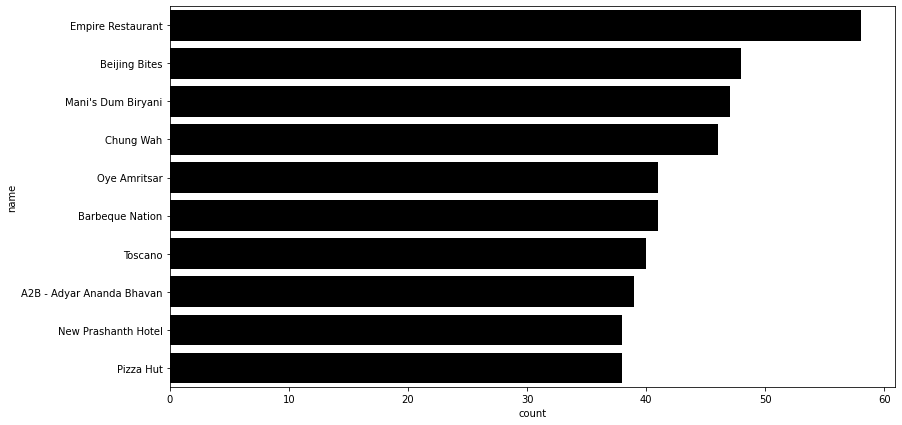

In [163]:
rcParams['figure.figsize'] = 13,7
sns.barplot(y=df_casual.head(10)['name'],x=df_casual.head(10)['count'],color='black')

According to our horizontal barplot we can see that "Empire Restaurat", "Beijing Bites" and "Mani's Dum Biryani" restaurants are the top 3 casual dining restaurants based on their counts. 

<a id='conclusions'></a>
## Conclusions

In our "Zomato Data Analysis" project we try to answer so many questions of Zomato data which is an Indian multinational restaurant aggregator and food delivery company founded in 2008.

Firstly, we try to get some info based on the restaurant ratings. According to the ratings the first restaurant is 1131 Bar + Kitchen and has an average rating of 4.5, the second restaurant is 1522 - The Pub and has an average rating of 4.21 and the third restaurant is 12th Main- Grand Mercure and has an average rating of 4.1 and most of the restaurants have average rating between 3 and 4. And also, the top 3 most famuous restaurant chains are "Cafe Coffee Day","Onesta" and "Empire Restaurant". And we have 2436 restaurants with rating over 4, 60 restaurants with rating over 4 and approximate cost for two people below&equal 500 rupee at all locations.

When we check the orders we see that most of the restaurants provide online orders and "Whitefield" has the most number of restaurants with 634, then second "BTM" with 581 restaurants and third "HSR" with 553 restaurants. Plus, top 3 cuisines are "North Indian","North Indian, Chinese" and "South Indian".

Regarding the approximate cost for 2 people analysis, we see that mostly approximate cost for two people is between 300-500 rupee and when we check the online order status of the restaurants we see that online order 'Yes' types restaurants are cheaper than the online_order "No" types. After having checked prices, we can also see that budget hotel list that have approximate cost for two people below 500 and the lowest approximate cost is 40 rupee. 

According to the locations, the most foodie locations are "BTM", "Koramangala 5th Block" and "HSR". Based on our heatmaps we can easily see the locations with the most restaurants are "Koramangala" and "Seshadripuram".

Lastly, we can see that "Empire Restaurant", "Beijing Bites" and "Mani's Dum Biryani" restaurants are the top 3 casual dining restaurants based on their counts.